In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
k = np.array([[270.1132079536561, 0.0, 539.4278422993344], 
            [0.0, 270.12435793063867, 359.65772231968793],
            [0.0, 0.0, 1.0]])

dist_coeffs = np.array([[0.0838650200838641], [0.004369973071477834], [0.006062524916889637], [-0.0019177722768309521]])

dims = (1080,720)


(1080, 720)


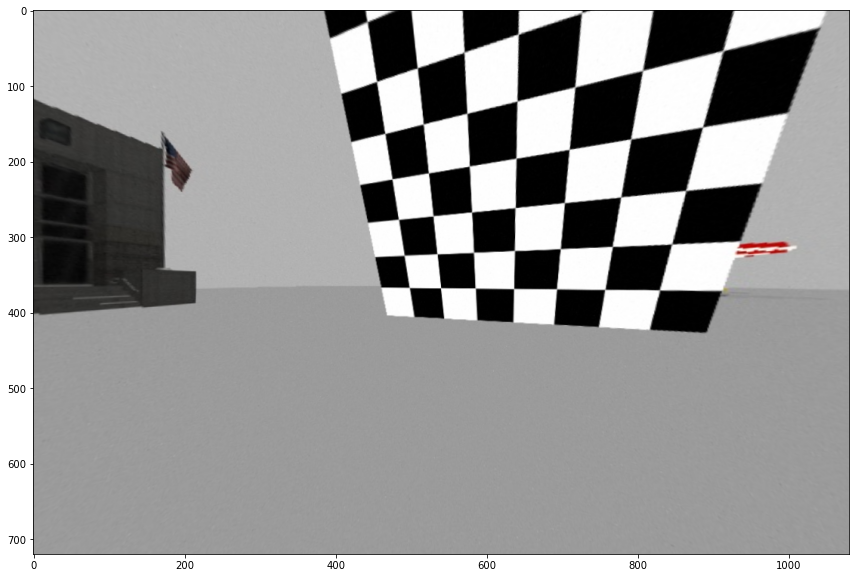

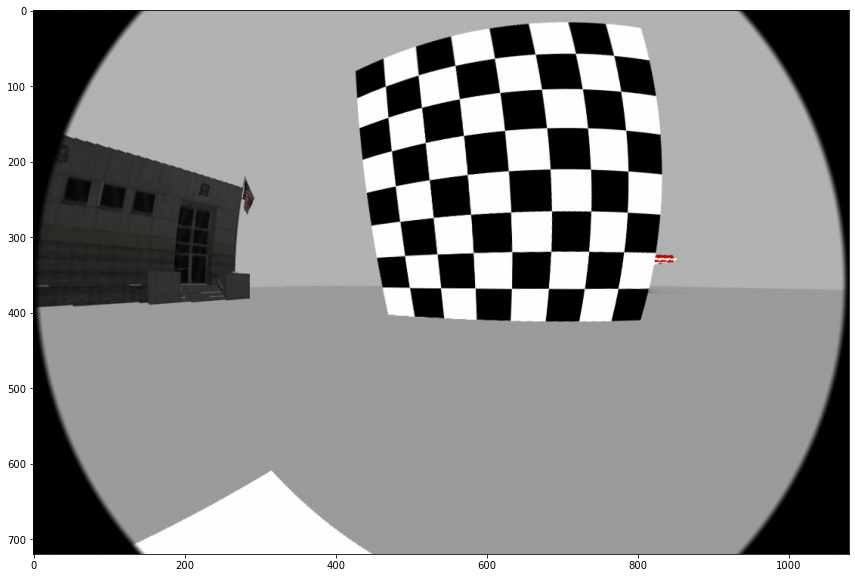

In [6]:
#this method removes 30 percent of original image
def undistort(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    print(img.shape[:2][::-1])
    h,w = img.shape[:2]
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(k, dist_coeffs, np.eye(3), k, dims, cv2.CV_16SC2)
    
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
#     cv2.imshow("undistorted", undistorted_img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    plt.figure(figsize=(20,10))
    plt.imshow(undistorted_img)
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    
# img = cv2.imread("images/image_0.jpg")
undistort("calib_images/image_1.jpg")

In [14]:
K = np.array([[270.1132079536561, 0.0, 539.4278422993344], 
            [0.0, 270.12435793063867, 359.65772231968793],
            [0.0, 0.0, 1.0]])

D = np.array([[0.0838650200838641], [0.004369973071477834], [0.006062524916889637], [-0.0019177722768309521]])

[[270.11320795   0.         539.4278423 ]
 [  0.         270.12435793 359.65772232]
 [  0.           0.           1.        ]]
[[270.11320795   0.         539.4278423 ]
 [  0.         270.12435793 359.65772232]
 [  0.           0.           1.        ]]


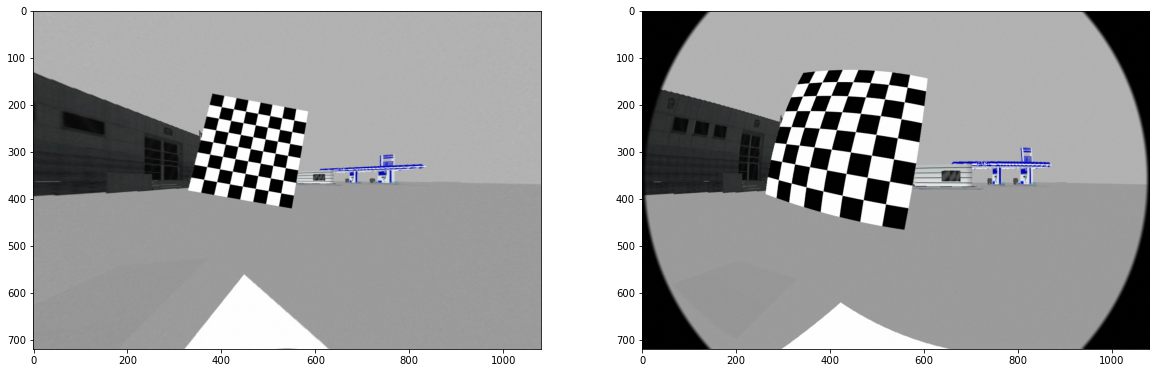

In [15]:
def undistort2(img_path, balance=0.0, dim2=None, dim3=None):
    img = cv2.imread(img_path)
    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    assert dim1[0]/dim1[1] == dims[0]/dims[1], "Image to undistort needs to have same aspect ratio as the ones used in calibration"

    if not dim2:
        dim2 = dim1
    if not dim3:
        dim3 = dim1
    scaled_K = K * dim1[0] / dims[0]  # The values of K is to scale with image dimension.
    scaled_K[2][2] = 1.0  # Except that K[2][2] is always 1.0
    
    print(K)
    print(scaled_K)
    # This is how scaled_K, dim2 and balance are used to determine the final K used to un-distort image. OpenCV document failed to make this clear!
    new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, dim2, np.eye(3), balance=balance)
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), new_K, dim3, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
#     cv2.imshow("undistorted", undistorted_img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(undistorted_img)
    plt.subplot(1,2,2)
    plt.imshow(img)

undistort2("calib_images/image_10.jpg")